The last piece of this puzzle: start the real data testing!

Theoretically, we do not know the exact scale on the horizontal axis, so that's why we included two different scales of horizontal axis' data. Anyway to make this general we use the full trained data.

Note: this notebook is for 1D, may need extra care, i.e. multiple 1D curves for one 2D figure. Take averages for them.

In [43]:
# Read the xgboost model: 94% accuracy
import numpy as np
import xgboost as xgb
from sklearn import datasets
import pickle
from matplotlib import pyplot as plt

with open('clf_xgboost_1d.pickle', 'rb') as f:
    clf2 = pickle.load(f)

trial_data = np.load('total_exp_data.npy')

N = len(trial_data)
M = 28
print(np.shape(trial_data))

data_1D = []
indexes = []
for i in range(N):
    for j in range(M):
        route = trial_data[i][:, j]
        if np.argmax(route[M // 2 -3: M//2 + 3]) in [2, 3]:
            route += 0 * np.random.normal(size=28)
            data_1D.append(route)
            indexes.append(i)
            #labels.append(labels_2D[i])
print(indexes)
data_1D = np.array(data_1D)

print(np.shape(data_1D))

result = clf2.predict(xgb.DMatrix(data_1D))
print(f'Probabilities of experiments are (True/False) majorana zero mode:')
#print(result)

result_prob = [max([result[i] for i, x in enumerate(indexes) if int(x) == int(j)]) for j in range(16)]
print(result_prob)
result_prob = np.array(result_prob)

(16, 28, 28)
[0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15]
(157, 28)
Probabilities of experiments are (True/False) majorana zero mode:
[0.1728747, 0.2879333, 0.56795955, 0.0114132585, 0.34154153, 0.4620103, 0.007675831, 0.4344964, 0.12696715, 0.2528075, 0.14624916, 0.007675831, 0.4166106, 0.28149843, 0.024170186, 0.024378475]


Plot some histogram:

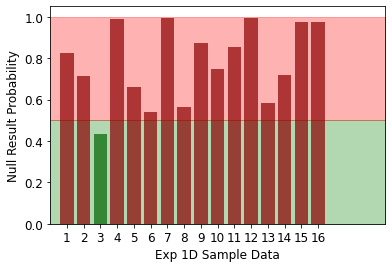

In [44]:
from matplotlib import pyplot as plt
values = 1 - result_prob
indexes = range(1, 17)

plt.rcParams['font.size'] = 12
for idx, val in zip(indexes, values):
    color = 'darkgreen' if val < 0.5 else 'darkred'
    plt.bar(idx, val, color=color, alpha=0.7)

plt.fill_between(range(21), 0, 0.5, color='green', alpha=0.3)
plt.fill_between(range(21), 0.5, 1, color='red', alpha=0.3)
plt.xticks(range(1, 17))
plt.xlabel('Exp 1D Sample Data')
plt.xlim(0, 20)
plt.ylim(0, 1.05)
plt.ylabel('Null Result Probability')
plt.savefig('Exptrial_results_1d.svg')
plt.show()